In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import warnings
from socceraction import spadl
import matplotsoccer
from mplsoccer import Pitch, Sbopen, VerticalPitch

Contém a exploração inicial da visualização da sequência de jogadas até um gol. No caso, escolhemos  o jogo da La Liga entre Barcelona e Real Marid, no Camp Nou, para realizar os testes.

In [2]:
BARCELONA_VS_REAL_MADRID_ID: int = 2565907
BARCELONA_ID: int = 676 # home team id
spain_df: pd.DataFrame = pd.read_json("../data/wyscout/events/events_Spain.json")
match_df: pd.DataFrame = spain_df[spain_df["matchId"] == BARCELONA_VS_REAL_MADRID_ID]
players_df: pd.DataFrame = pd.read_json("../data/wyscout/players/players.json", encoding="iso-8859-1")

In [3]:
match_df.rename(columns={"eventId": "type_id", "matchPeriod": "period_id", "subEventId": "subtype_id", "matchId": "game_id", "teamId": "team_id", "eventSec": "milliseconds", "playerId": "player_id", "id": "event_id"}, inplace=True)
match_df["period_id"] = pd.factorize(match_df["period_id"])[0] + 1
spadl_df: pd.DataFrame = spadl.wyscout.convert_to_actions(match_df, BARCELONA_ID)
spadl_df

/tmp/ipykernel_8777/1195748063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df.rename(columns={"eventId": "type_id", "matchPeriod": "period_id", "subEventId": "subtype_id", "matchId": "game_id", "teamId": "team_id", "eventSec": "milliseconds", "playerId": "player_id", "id": "event_id"}, inplace=True)
/tmp/ipykernel_8777/1195748063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df["period_id"] = pd.factorize(match_df["period_id"])[0] + 1


,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id
0,2565907,1,0.003275,675,3321,52.50,33.32,66.15,27.20,249644096,0,0,1,0
1,2565907,1,0.005109,675,14723,66.15,27.20,73.50,15.64,249644097,0,0,1,1
2,2565907,1,0.007110,675,3306,73.50,15.64,77.70,38.76,249644098,0,0,1,2
3,2565907,1,0.008912,675,3309,77.70,38.76,96.60,27.20,249644099,0,0,1,3
4,2565907,1,0.011290,675,3915,96.60,27.20,93.45,9.52,249644100,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,2565907,2,2.968944,676,222770,5.25,34.68,5.25,34.68,249646245,0,10,1,1436
1437,2565907,2,2.968944,676,222770,5.25,34.68,0.00,68.00,249646245,0,18,0,1437
1438,2565907,2,2.982540,675,4498,0.00,68.00,12.60,34.68,249646064,0,5,1,1438
1439,2565907,2,2.984949,675,3306,12.60,40.80,12.60,40.80,249646066,0,8,0,1439


In [4]:
# Limpando os dados para ser compativeis com o matplotsoccer

spadl_df["result_name"] = spadl_df["result_id"].apply(lambda x: "success" if x == 1 else "fail")
spadl_df["team_name"] = spadl_df["team_id"].apply(lambda x: "Barcelona" if x == BARCELONA_ID else "Real Madrid")
spadl_df["player_name"] = spadl_df["player_id"].map(players_df.set_index("wyId")["shortName"])

actiontypes: list[str] = [
    'pass',
    'cross',
    'throw_in',
    'freekick_crossed',
    'freekick_short',
    'corner_crossed',
    'corner_short',
    'take_on',
    'foul',
    'tackle',
    'interception',
    'shot',
    'shot_penalty',
    'shot_freekick',
    'keeper_save',
    'keeper_claim',
    'keeper_punch',
    'keeper_pick_up',
    'clearance',
    'bad_touch',
    'non_action',
    'dribble',
    'goalkick',
]
spadl_df["type_name"] = spadl_df["type_id"].apply(lambda x: actiontypes[x])
spadl_df.rename(columns={"milliseconds": "time_seconds"})

spadl_df

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,result_name,team_name,player_name,type_name
0,2565907,1,0.003275,675,3321,52.50,33.32,66.15,27.20,249644096,0,0,1,0,success,Real Madrid,K. Benzema,pass
1,2565907,1,0.005109,675,14723,66.15,27.20,73.50,15.64,249644097,0,0,1,1,success,Real Madrid,T. Kroos,pass
2,2565907,1,0.007110,675,3306,73.50,15.64,77.70,38.76,249644098,0,0,1,2,success,Real Madrid,Sergio Ramos,pass
3,2565907,1,0.008912,675,3309,77.70,38.76,96.60,27.20,249644099,0,0,1,3,success,Real Madrid,R. Varane,pass
4,2565907,1,0.011290,675,3915,96.60,27.20,93.45,9.52,249644100,0,0,1,4,success,Real Madrid,K. Navas,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,2565907,2,2.968944,676,222770,5.25,34.68,5.25,34.68,249646245,0,10,1,1436,success,Barcelona,N\u00e9lson Semedo,interception
1437,2565907,2,2.968944,676,222770,5.25,34.68,0.00,68.00,249646245,0,18,0,1437,fail,Barcelona,N\u00e9lson Semedo,clearance
1438,2565907,2,2.982540,675,4498,0.00,68.00,12.60,34.68,249646064,0,5,1,1438,success,Real Madrid,Lucas V\u00e1zquez,corner_crossed
1439,2565907,2,2.984949,675,3306,12.60,40.80,12.60,40.80,249646066,0,8,0,1439,fail,Real Madrid,Sergio Ramos,foul


Nós identificamos no dataframe qual a ação correspondente ao gol feito pelo Cristiano Ronal nessa partida e visualizamos as  5 ações que culminaram nele.

In [5]:
RONALDO_GOAL_ID: int = 231
actions_df: pd.DataFrame = spadl_df[RONALDO_GOAL_ID - 4: RONALDO_GOAL_ID + 1].copy()
actions_df

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,result_name,team_name,player_name,type_name
227,2565907,1,0.841186,675,3321,3.15,40.12,1.05,34.68,249644267,1,0,1,227,success,Real Madrid,K. Benzema,pass
228,2565907,1,0.842263,675,3322,1.05,34.68,0.00,34.00,249644266,5,11,1,228,success,Real Madrid,Cristiano Ronaldo,shot
229,2565907,1,0.955678,676,3346,45.15,42.16,61.95,14.96,249644831,0,0,1,229,success,Barcelona,Sergio Busquets,pass
230,2565907,1,0.960496,676,3802,61.95,14.96,47.25,22.44,249644832,0,0,1,230,success,Barcelona,Philippe Coutinho,pass
231,2565907,1,0.962803,676,3476,47.25,22.44,49.35,40.80,249644833,0,0,1,231,success,Barcelona,I. Rakiti\u0107,pass


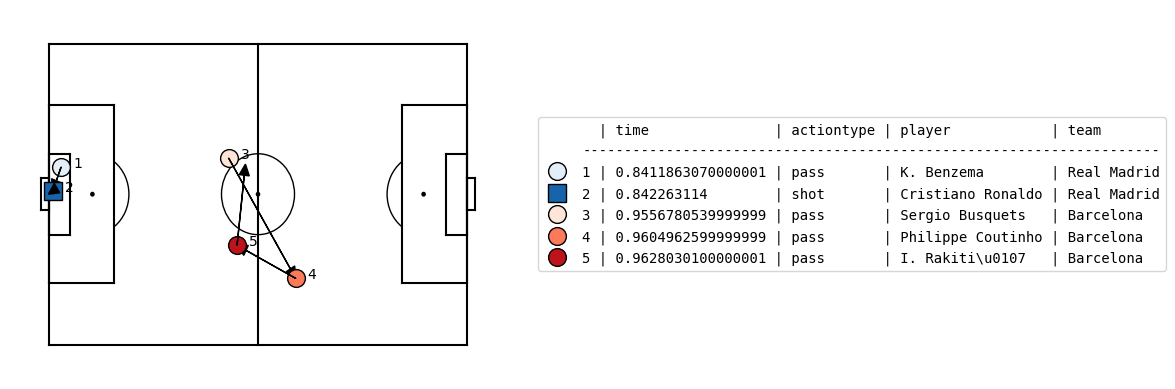

In [6]:
matplotsoccer.actions(
    location=actions_df[["start_x", "start_y", "end_x", "end_y"]],
    action_type=actions_df.type_name,
    team=actions_df.team_name,
    result=actions_df.result_name == "success",
    label=actions_df[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time","actiontype","player","team"],
    zoom=False
)